In [233]:
import pandas as pd
import numpy as np

In [234]:
sales=pd.read_csv('SalesAnalysis//Sales_Data//Sales_April_2019.csv')
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [235]:
#concat sales data from for other month files
import os
files=[file for file in os.listdir('SalesAnalysis/Sales_Data')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [236]:
for index in range(1,len(files)):
    new=pd.read_csv('SalesAnalysis//Sales_Data//'+files[index])
    sales=pd.concat([sales,new])
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [237]:
sales.shape

(186850, 6)

In [238]:
sales[sales['Order ID'].isna()].shape

(545, 6)

In [239]:
#removing rows with nan values
sales=sales[~sales['Order ID'].isna()]

In [240]:
sales.shape

(186305, 6)

In [241]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [242]:
#check for null values
sales.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [243]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [244]:
sales[sales['Order Date'].str[0:2]=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [245]:
sales=sales[sales['Order Date'].str[0:2]!='Or']

In [246]:
#change datatypes of columns
sales['Quantity Ordered']=sales['Quantity Ordered'].astype(int)
sales['Price Each']=sales['Price Each'].astype(float)
sales['Order Date']=pd.to_datetime(sales['Order Date'])

In [247]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


In [248]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [249]:
sales['Amount']=sales['Quantity Ordered']*sales['Price Each']
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [250]:
sales['month']=sales['Order Date'].dt.month

In [251]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


## Month with highest sales

In [252]:

results=sales.groupby(['month']).sum()
results.head()

,Quantity Ordered,Price Each,Amount
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


In [253]:

import matplotlib.pyplot as plt
%matplotlib inline

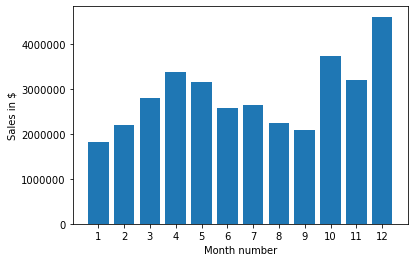

In [265]:
fig, ax = plt.subplots()
ax.bar(results.index,results.Amount.round(2))
ax.ticklabel_format(style='plain')
plt.xticks(results.index)
plt.ylabel('Sales in $')
plt.xlabel('Month number')
plt.show()

## City with highest Sales

In [266]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [267]:
#get city names
sales['city']=sales['Purchase Address'].apply(lambda x:x.split(',')[1])
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount,month,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles


In [268]:
sales['city'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [269]:
results=sales.groupby(['city']).sum()
#results['Amount']=results['Amount'].apply(lambda x: '{:.2f}'.format(x))
results.reset_index(inplace=True)
results.head(3)

,city,Quantity Ordered,Price Each,Amount,month
0,Atlanta,16602,2779908.20,2795498.58,104794
1,Austin,11153,1809873.61,1819581.75,69829
2,Boston,22528,3637409.77,3661642.01,141112


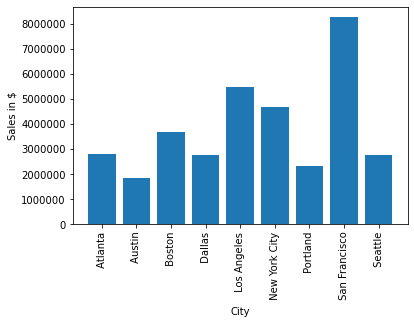

In [273]:
fig, ax = plt.subplots()
ax.bar(results.city,results.Amount)
ax.ticklabel_format(axis='y',style='plain')
plt.xticks(results.city,rotation='vertical')
plt.ylabel('Sales in $')
plt.xlabel('City')
plt.show()

In [274]:
#get state names
sales['state']=sales['Purchase Address'].apply(lambda x:x.split(',')[2].strip().split(' ')[0])

In [275]:
sales.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount,month,city,state
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,CA


## Time to advertise to maximize purchase

In [276]:
sales['hour']=sales['Order Date'].dt.hour
sales.head(3)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount,month,city,state,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,CA,14


In [277]:
results=sales.groupby(['hour']).sum()
results.head()

,Quantity Ordered,Price Each,Amount,month
hour,,,,
0,4428,709296.70,713721.27,27554
1,2619,458490.00,460866.88,16657
2,1398,233833.64,234851.44,8507
3,928,144726.42,145757.89,5904
4,937,162058.18,162661.01,6148


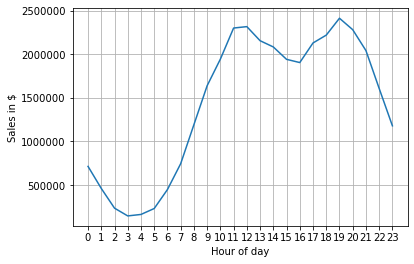

In [278]:
fig, ax = plt.subplots()
ax.plot(results.index,results.Amount)
ax.ticklabel_format(axis='y',style='plain')
plt.xticks(results.index)
plt.ylabel('Sales in $')
plt.xlabel('Hour of day')
plt.grid()
plt.show()

## products sold together

In [218]:
sales_grouped=sales.copy(deep=True)
sales_grouped['Product']=sales.groupby(['Order ID'])['Product'].transform(lambda x:','.join(x))
sales_grouped.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount,month,city,state,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,MA,22
3,176560,"Google Phone,Wired Headphones",1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,CA,14
4,176560,"Google Phone,Wired Headphones",1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,CA,9


In [219]:
sales_grouped=sales_grouped[['Order ID','Product']].drop_duplicates()

In [220]:
sales_grouped.head()

,Order ID,Product
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone,Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable


In [221]:
sales_grouped['Product'].value_counts().sort_values(ascending=False)

Lightning Charging Cable                                            19831
AAA Batteries (4-pack)                                              19826
AA Batteries (4-pack)                                               19809
USB-C Charging Cable                                                19792
Wired Headphones                                                    17208
                                                                    ...  
iPhone,iPhone                                                           1
iPhone,Lightning Charging Cable,Vareebadd Phone                         1
Google Phone,27in 4K Gaming Monitor                                     1
LG Dryer,Vareebadd Phone                                                1
Google Phone,Bose SoundSport Headphones,Apple Airpods Headphones        1
Name: Product, Length: 385, dtype: int64

In [223]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in sales_grouped['Product']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

## Product that sold the most

In [227]:
results=sales.groupby(['Product']).sum()
results['Quantity Ordered'].sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

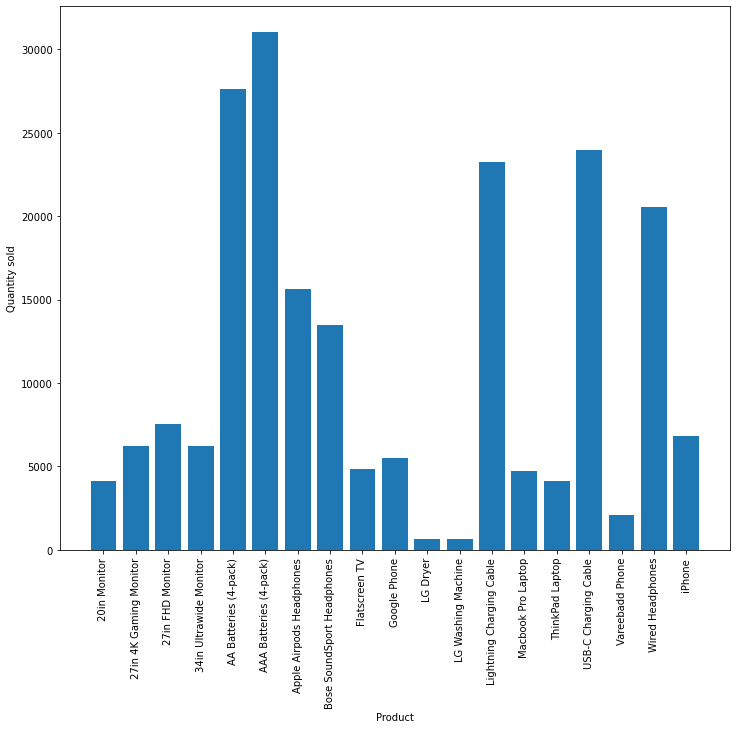

In [231]:
plt.figure(figsize=(12,10))
plt.bar(results.index,results['Quantity Ordered'])
plt.xticks(results.index,rotation='vertical')
plt.ylabel('Quantity sold')
plt.xlabel('Product')
plt.show()